<center><h1>Reddit Data Analysis(EDA)-v1</h1></center>
<hr>

## What is about..

Explore the Reddit Dataset.

## Thanks to.. <a id="top"></a>

> **Kaggle Data**<br>
> 
> [Reddit - Data is Beautiful](https://www.kaggle.com/unanimad/dataisbeautiful)

## Table of Contents.. <a id="top"></a>

1. [Problem Description](#1)
2. [Data Description](#2)
3. [Environment Setting](#3)
    1. [Import Library](#3.1)
    2. [Load Dataset](#3.2)
4. [Data Preprocessing](#4)
    1. [Missing Value](#4.1)
    2. [Time Management](#4.2)
5. [Exploratory Data Analysis(EDA)](#5)
    1. [Distribution of Numerical Value](#5.1)
    2. [Time Analysis](#5.2)

<hr>

# 1. Problem Description <a id="1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

Using Reddit Dataset, do Exploratory Data Analysis. Question and Validation using Data Visualization.

# 2. Data Description <a id="2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

Reddit Data is Beautiful - from [Kaggle](https://www.kaggle.com/unanimad/dataisbeautiful)
> **About**<br>
> 
> Data is Beautiful, r/dataisbeautiful, is a place for visual representations of data: Graphs, charts, maps, etc. DataIsBeautiful is for visualizations that effectively convey information. Aesthetics are an important part of information visualization, but pretty pictures are not the aim of this subreddit.

> **Content**<br>
> 
> This dataset contains a couple of fields with the information based on Reddit post submission, such:
> Fields:
> * id
> * title
> * score
> * author
> * authorfalirtext
> * removed_by
> * totalawardsreceived
> * awarders
> * created_utc
> * full_link
> * num_commnets
> * over_18

> **Method**<br>
> 
> The data was extracted using the PushShift API for Reddit. Thanks Watchful1 for show me this API.

# 3. Environment Setting<a id="3"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 3.1. Import Library<a id="3.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [63]:
# Date and Time
import datetime

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Data
import numpy as np

# Machine Learning
import sklearn

In [4]:
pd.options.display.max_rows = 499
pd.options.display.max_columns = 499
pd.options.mode.chained_assignment = None

In [5]:
%matplotlib inline

## 3.2. Load Dataset<a id="3.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [6]:
raw = pd.read_csv('./data/r_dataisbeautiful_posts.csv', encoding='utf-8')
raw

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,NaN,NaN,0.0,[],1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,NaN,NaN,0.0,[],1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,OC: 2,NaN,0.0,[],1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,NaN,NaN,0.0,[],1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,gg08xz,Web Scraping with Python,1,yakult2450,NaN,NaN,0.0,[],1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,NaN,NaN,NaN,NaN,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,NaN,NaN,NaN,NaN,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178309,pq922,Wavii.,13,ddshroom,NaN,NaN,NaN,NaN,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,NaN,NaN,NaN,NaN,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178312 entries, 0 to 178311
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     178312 non-null  object 
 1   title                  178311 non-null  object 
 2   score                  178312 non-null  int64  
 3   author                 178312 non-null  object 
 4   author_flair_text      23223 non-null   object 
 5   removed_by             8895 non-null    object 
 6   total_awards_received  38306 non-null   float64
 7   awarders               27631 non-null   object 
 8   created_utc            178312 non-null  int64  
 9   full_link              178312 non-null  object 
 10  num_comments           178312 non-null  int64  
 11  over_18                178312 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 15.1+ MB


In [8]:
raw.describe(include='all')

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
count,178312,178311,178312.000000,178312,23223,8895,38306.000000,27631,1.783120e+05,178312,178312.000000,178312
unique,178312,165048,NaN,76829,184,5,NaN,2,NaN,178312,NaN,2
top,608xuh,data_irl,NaN,[deleted],OC: 1,moderator,NaN,[],NaN,https://www.reddit.com/r/dataisbeautiful/comme...,NaN,False
freq,1,1060,NaN,27914,7706,6256,NaN,27630,NaN,1,NaN,177394
mean,NaN,NaN,190.231729,NaN,NaN,NaN,0.002193,NaN,1.494084e+09,NaN,25.233462,NaN
std,NaN,NaN,1985.573519,NaN,NaN,NaN,0.095290,NaN,6.248934e+07,NaN,195.243672,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1.329263e+09,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,1.446637e+09,NaN,1.000000,NaN
50%,NaN,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,1.493295e+09,NaN,1.000000,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,0.000000,NaN,1.550178e+09,NaN,4.000000,NaN


In [10]:
raw.isna().sum()

id                            0
title                         1
score                         0
author                        0
author_flair_text        155089
removed_by               169417
total_awards_received    140006
awarders                 150681
created_utc                   0
full_link                     0
num_comments                  0
over_18                       0
dtype: int64

# 4. Data Preprocessing<a id="4"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 4.1. Missing Value<a id="4.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [25]:
cleaned = raw.copy()

**title**<br>
impute title to 'null'

In [26]:
cleaned.title = cleaned.title.fillna('null')

In [27]:
cleaned[cleaned.title == 'null']

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
92417,62nr1e,null,0,turn-down-for-what,NaN,NaN,NaN,NaN,1490990982,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


**author_flair_text, removed_by, total_awards_received, awarders**<br>
drop

In [28]:
columns = ['author_flair_text', 'removed_by', 'total_awards_received', 'awarders']
cleaned = cleaned.drop(columns, axis=1)
cleaned

,id,title,score,author,created_utc,full_link,num_comments,over_18
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False


In [29]:
cleaned.isna().sum()

id              0
title           0
score           0
author          0
created_utc     0
full_link       0
num_comments    0
over_18         0
dtype: int64

## 4.2. Time Management<a id="4.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [92]:
def utc_to_datetime(data):
    data['year'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).year)
    data['month'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).month)
    data['day'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).day)    
    data['hour'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).hour)
    data['minute'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).minute)
    data['second'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).second)    

In [93]:
utc_to_datetime(cleaned)
cleaned

,id,title,score,author,created_utc,full_link,num_comments,over_18,year,month,day,hour,minute,second
0,gg0j19,[OC] A 3D visualization of covid19 evolution i...,1,oniltonmaciel,1588968371,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,6,11
1,gg0fz2,[OC] My household oil consumption and price si...,1,drfronkonstein,1588968103,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,1,43
2,gg0f9g,Most popular states for people leaving New Yor...,1,AKWorld135,1588968045,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,5,0,45
3,gg0czr,[OC] Several animated climate maps showing a y...,1,MrTeacherMan,1588967860,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,57,40
4,gg08xz,Web Scraping with Python,1,yakult2450,1588967523,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2020,5,9,4,52,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178307,pqbdl,Infosthetics seems like it belongs here.,15,magiclamp,1329282849,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,14,9
178308,pqav2,Time lapse of every nuclear detonation from 19...,9,th3sousa,1329282160,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,14,2,40
178309,pq922,Wavii.,13,ddshroom,1329279777,https://www.reddit.com/r/dataisbeautiful/comme...,2,False,2012,2,15,13,22,57
178310,ppx09,An interactive representation of Pres. Obamas ...,21,zanycaswell,1329265203,https://www.reddit.com/r/dataisbeautiful/comme...,0,False,2012,2,15,9,20,3


# 5. Exploratory Data Analysis(EDA)<a id="5"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

## 5.1. Distribution of Numerical Value<a id="5.1"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [57]:
def boxplot(data, feature):
    plt.figure(figsize=(30, 12))
    sns.boxplot(x='over_18', y=feature, data=data)
    plt.show()

In [58]:
cleaned['score'].value_counts()

1        97705
0        15893
2         8577
3         5676
4         3838
         ...  
17604        1
3149         1
1100         1
7119         1
3391         1
Name: score, Length: 3961, dtype: int64

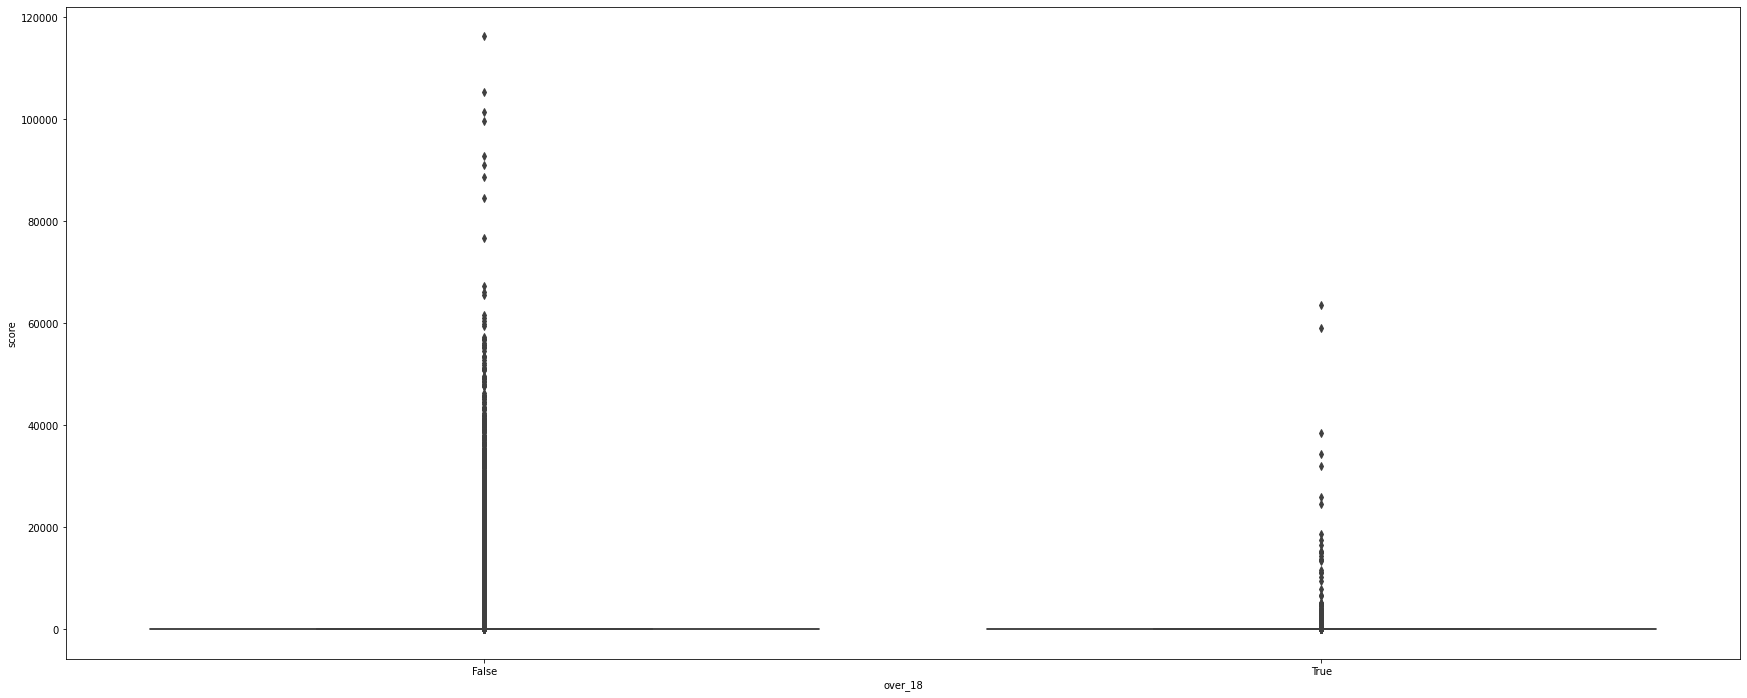

In [59]:
boxplot(cleaned, 'score')

In [60]:
cleaned['num_comments'].value_counts()

1       51883
0       41153
2       24845
3       10455
4        7653
        ...  
2412        1
1591        1
1463        1
1207        1
1535        1
Name: num_comments, Length: 1776, dtype: int64

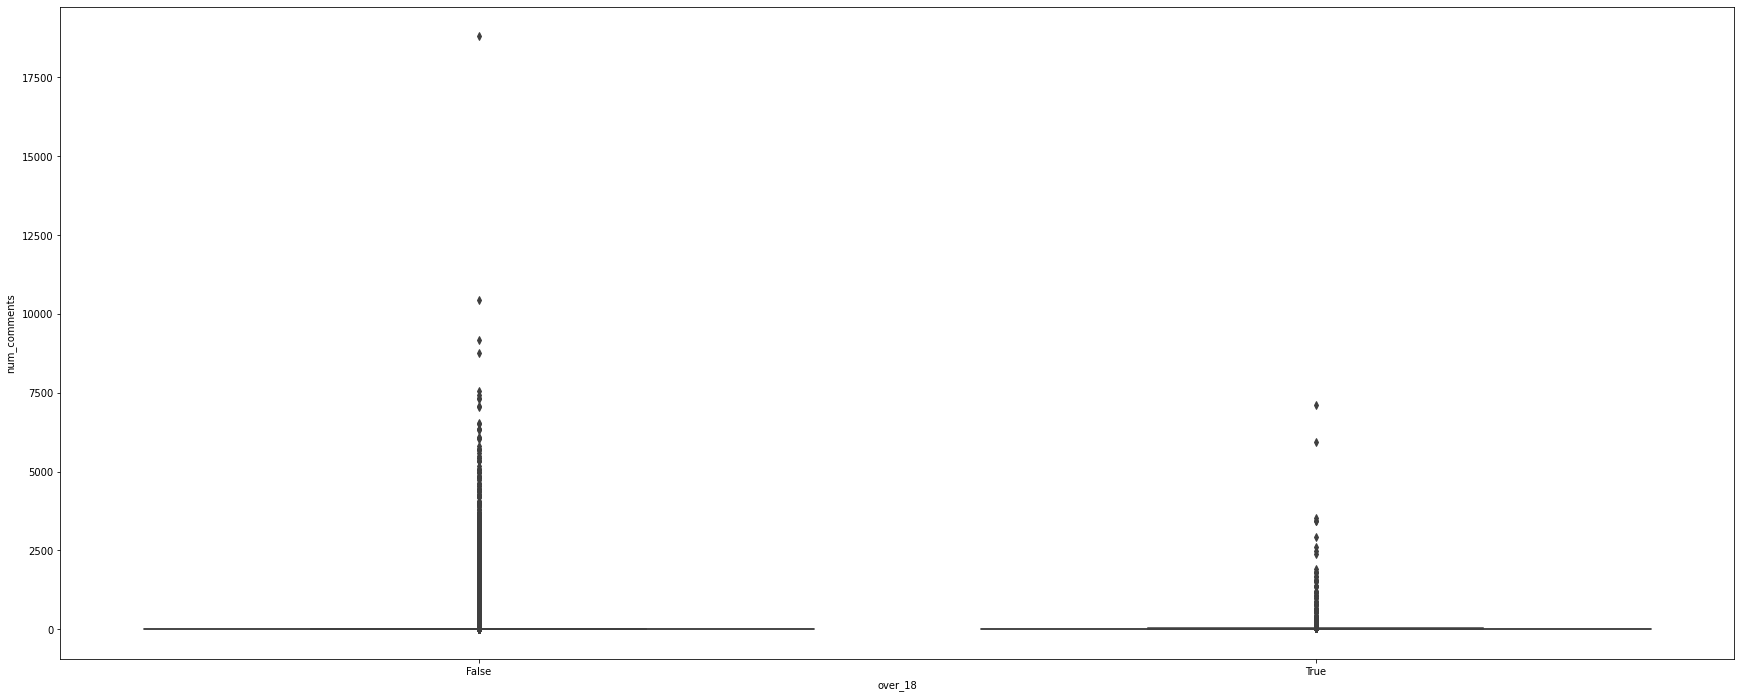

In [61]:
boxplot(cleaned, 'num_comments')

## 5.2. Time Analysis<a id="5.2"></a>
<p style="text-align:right;"><a href="#top">🔝 top</a></p>

In [130]:
def countplot(data, by='year'):
    assert by in ['year', 'month', 'day']
    data_copy = data.copy()
    data_copy['year'] = data_copy['year'].astype(str)
    data_copy['month'] = data_copy['month'].astype(str)
    data_copy['day'] = data_copy['day'].astype(str)

    plt.figure(figsize=(30, 10))
    if by == 'year':
        stat = data_copy['year'].value_counts()        
        sns.countplot(by, data=data_copy)
        plt.xlabel(by)
    elif by == 'month':
        data_copy['month'] = data_copy['year'] + '/' + data_copy['month']
        stat = data_copy['month'].value_counts()        
        sns.countplot(by, data=data_copy)
        plt.xlabel(by)
        plt.xticks(rotation=45)
    elif by == 'day':
        data_copy['day'] = data_copy['year'] + '/' + data_copy['month'] + '/' + data_copy['day']
        stat = data_copy['day'].value_counts()        
        sns.countplot(by, data=data_copy)            
        
    plt.ylabel('count')
    plt.title('Count by Year/Month/Day Recent to Old')
    plt.show()
    
    return stat
    

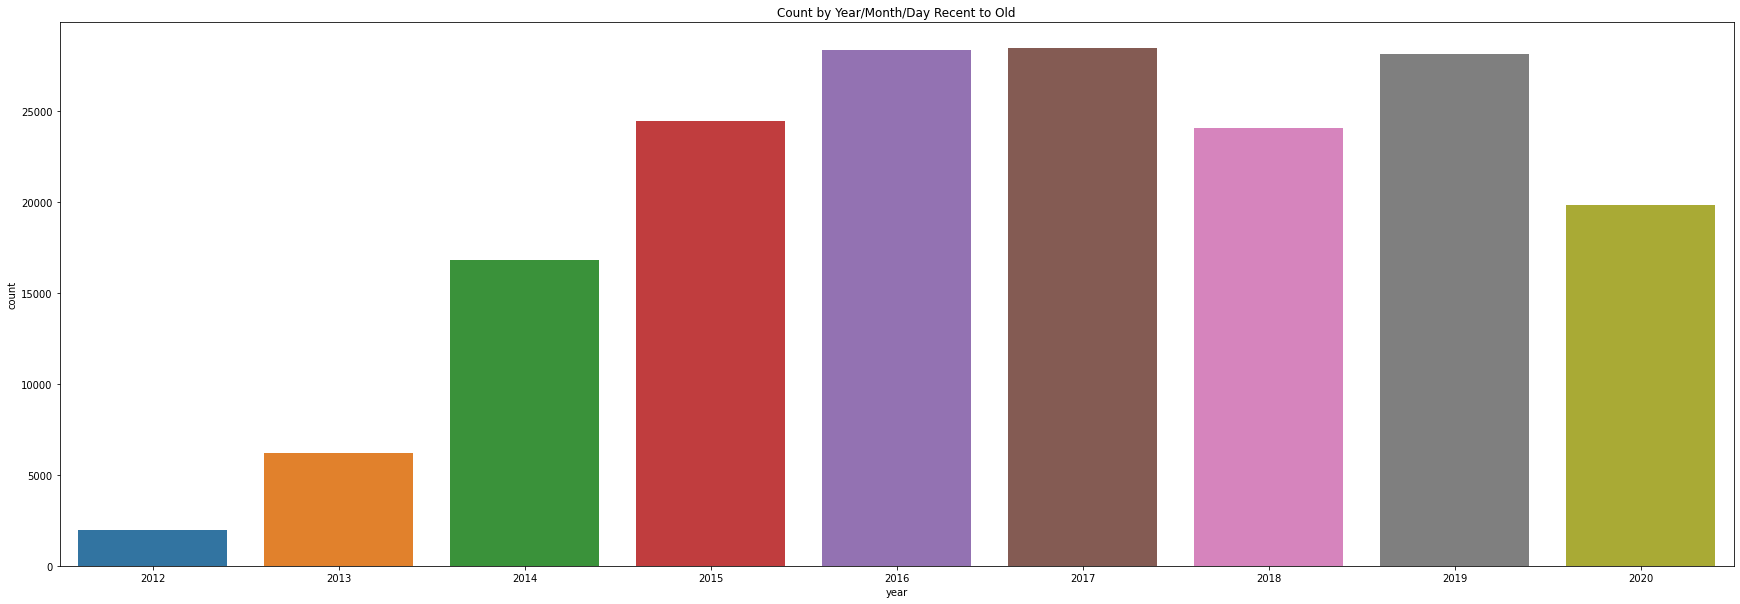

2017    28462
2016    28348
2019    28164
2015    24471
2018    24044
2020    19835
2014    16837
2013     6190
2012     1961
Name: year, dtype: int64

In [131]:
countplot(cleaned, 'year')

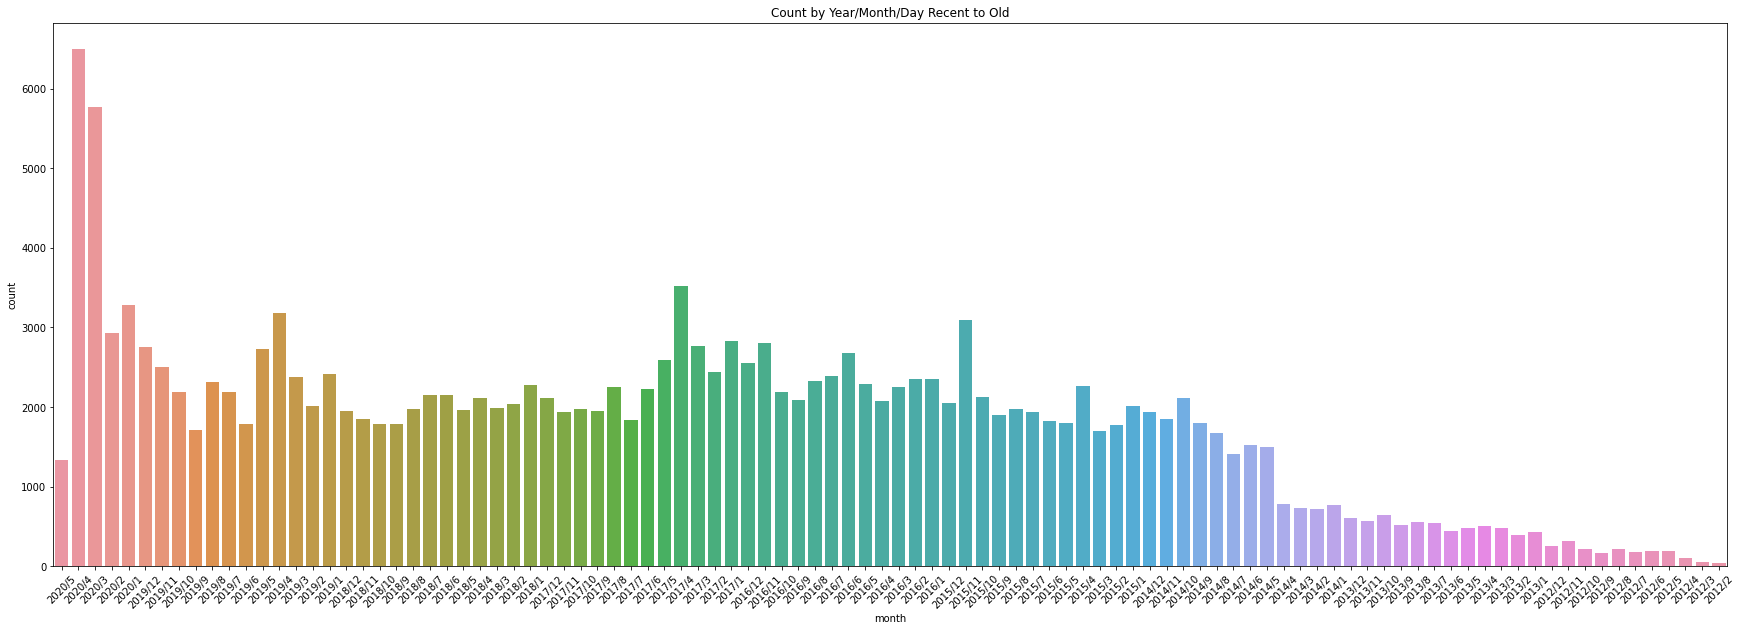

2020/4     6501
2020/3     5774
2017/4     3518
2020/1     3286
2019/4     3176
2015/11    3090
2020/2     2936
2017/1     2833
2016/11    2810
2017/3     2772
2019/12    2750
2019/5     2724
2016/6     2678
2017/5     2589
2016/12    2549
2019/11    2498
2017/2     2441
2019/1     2419
2016/7     2394
2019/3     2378
2016/2     2350
2016/1     2348
2016/8     2328
2019/8     2310
2016/5     2284
2018/1     2280
2015/4     2263
2016/3     2255
2017/8     2248
2017/6     2232
2019/7     2193
2019/10    2190
2016/10    2190
2018/6     2157
2018/7     2151
2015/10    2130
2017/12    2118
2014/10    2118
2018/4     2113
2016/9     2090
2016/4     2072
2015/12    2056
2018/2     2039
2019/2     2020
2015/1     2017
2018/3     1994
2017/10    1981
2015/8     1972
2018/8     1972
2018/5     1964
2018/12    1947
2017/9     1947
2017/11    1944
2014/12    1934
2015/7     1934
2015/9     1903
2014/11    1847
2018/11    1847
2017/7     1839
2015/6     1824
2015/5     1802
2014/9     1801
2019/6  

In [132]:
countplot(cleaned, 'month')

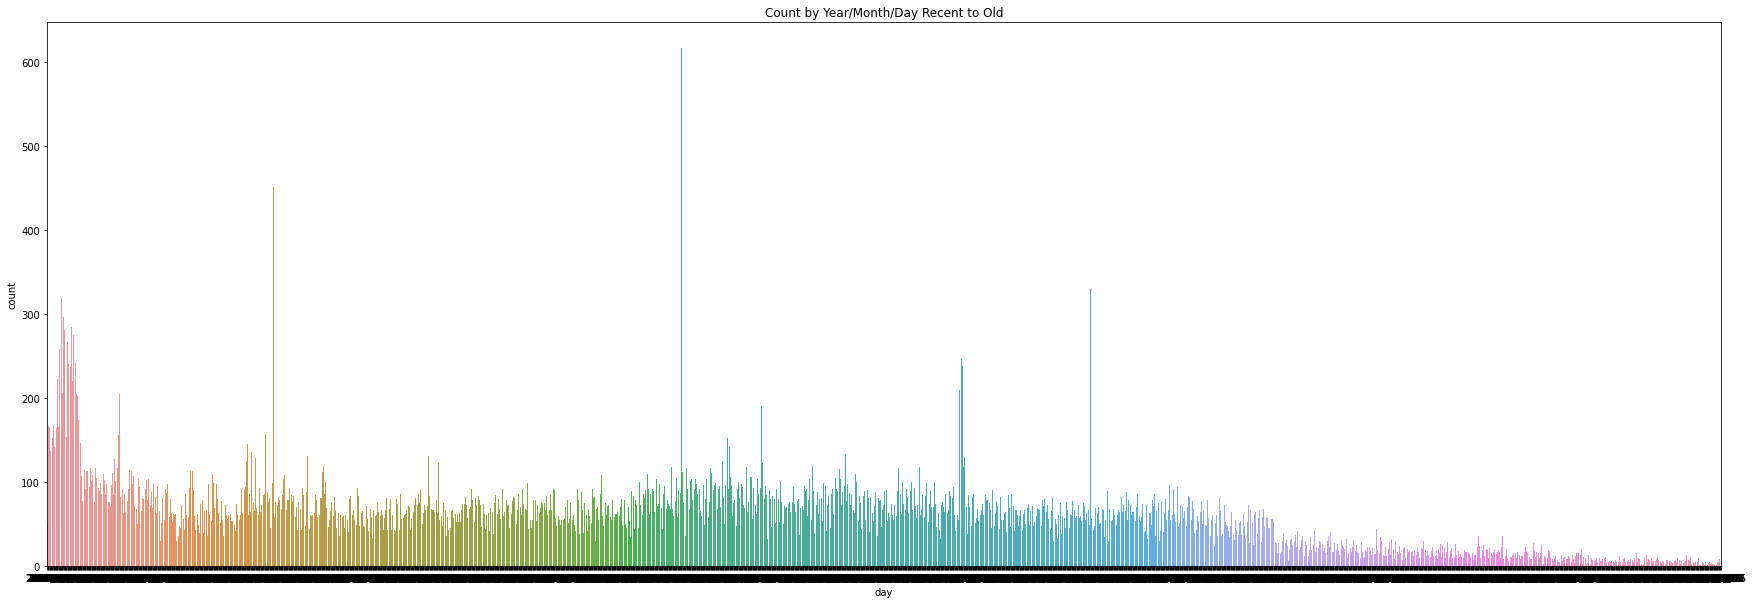

2017/4/2      617
2017/4/1      581
2019/4/2      524
2019/4/1      452
2020/4/2      348
             ... 
2012/4/7        1
2012/3/27       1
2012/10/13      1
2012/7/17       1
2012/3/2        1
Name: day, Length: 2991, dtype: int64

In [133]:
countplot(cleaned, 'day')

> What happened on April 1st, 2nd?